<a href="https://colab.research.google.com/github/hilmialfar/Self-Project/blob/main/EDA_Student_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Mental Health**

Dataset from [Kaggle](https://www.kaggle.com/datasets/shariful07/student-mental-health)

##**Import Libraries & Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
#import dataset
df = pd.read_csv("/content/drive/MyDrive/module_&_data/Data/Student Mental health.csv", encoding='unicode_escape') 
df.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


##**Data Analysis**

In [ ]:
#Information about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
#Remove the column 'Timestamp' as it is not used.
df.drop(['Timestamp'], axis = 1, inplace = True)

In [ ]:
#Rename columns
df_column = {'Choose your gender':'Gender','What is your course?':'Course',
             'Your current year of Study':'Year Study','What is your CGPA?':'CGPA',
             'Do you have Depression?':'Depression', 'Marital status':'Marital',
             'Do you have Anxiety?':'Anxiety', 'Do you have Panic attack?':'Panic Attack',
             'Did you seek any specialist for a treatment?':'Treatment'}
df.rename(columns=df_column,inplace=True)
df.head()

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
#Replace variable
df.replace({'Yes':1,'No':0,'Male':1,'Female':0}, inplace=True)
df.head()

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,0,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,1,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,1,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,0,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,1,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0


In [ ]:
#Checking datasets shape
df.shape

(101, 10)

In [ ]:
#Checking missing values
df.isnull().sum()

Gender          0
Age             1
Course          0
Year Study      0
CGPA            0
Marital         0
Depression      0
Anxiety         0
Panic Attack    0
Treatment       0
dtype: int64

In [ ]:
#Finding variable missing values
df[df.isna().any(axis=1)]

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
43,1,NaN,BIT,year 1,0 - 1.99,0,0,0,0,0


In [ ]:
#Replacing missing value with central tendency
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Age'] = df["Age"].astype(int)

In [ ]:
df.iloc[[43]]

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
43,1,20,BIT,year 1,0 - 1.99,0,0,0,0,0


In [ ]:
#Checking for the number of unique variables per column.
df.nunique()

Gender           2
Age              7
Course          49
Year Study       7
CGPA             6
Marital          2
Depression       2
Anxiety          2
Panic Attack     2
Treatment        2
dtype: int64

In [ ]:
#Checking unique variables
df["Year Study"].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [ ]:
#Replacing variables
df['Year Study'].replace(['year 1','year 2','year 3','year 4'],['Year 1','Year 2','Year 3','Year 4'], inplace=True)
df["Year Study"].unique()

array(['Year 1', 'Year 2', 'Year 3', 'Year 4'], dtype=object)

In [ ]:
#Checking unique variables
df["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [ ]:
#Replacing variables
df.replace({'3.50 - 4.00 ':'3.50 - 4.00'},regex=True,inplace=True)
df["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

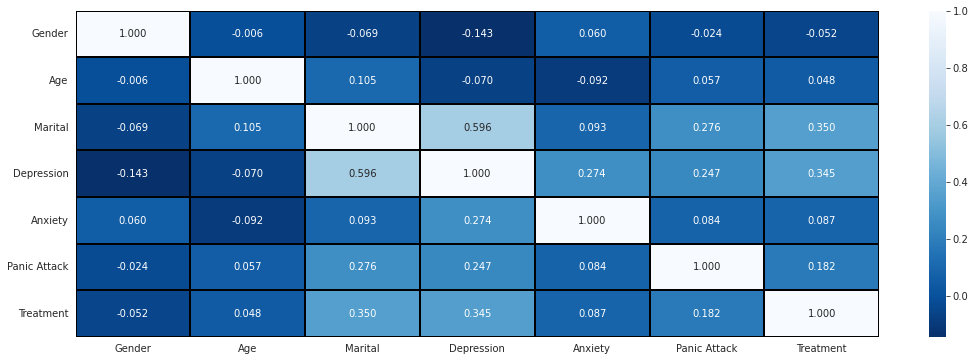

In [ ]:
#Checking correlation between columns using heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues_r', linewidth=1, linecolor='black', fmt='.3f')
plt.show()

##**Visualization**

### **Gender**

In [ ]:
#Counting the number of students by gender
gen_count = pd.DataFrame(df['Gender'].value_counts().reset_index())
gen_count.rename(columns = {'index':'Gender','Gender':'Number of Students'}, inplace=True)
gen_count.replace({0:'Female', 1:'Male'}, inplace=True)
gen_count

,Gender,Number of Students
0,Female,75
1,Male,26


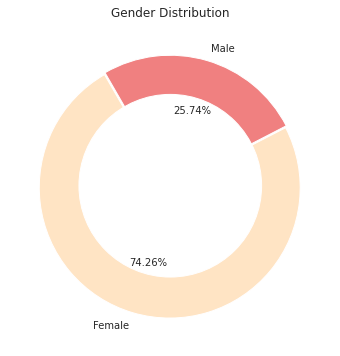

In [ ]:
#Visualization gender distribution with pie chart
plt.figure(figsize=(8,6))
plt.pie(gen_count['Number of Students'], explode=(0.015,0),
        labels=gen_count['Gender'],
        colors=['bisque','lightcoral'], autopct='%1.2f%%', 
        startangle=120)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Gender Distribution")
plt.show()

In [ ]:
#Filtering student who have depression, anxiety, or panic attack
dep = df[df["Depression"]== 1]
anx = df[df["Anxiety"]== 1]
pa = df[df["Panic Attack"]== 1]

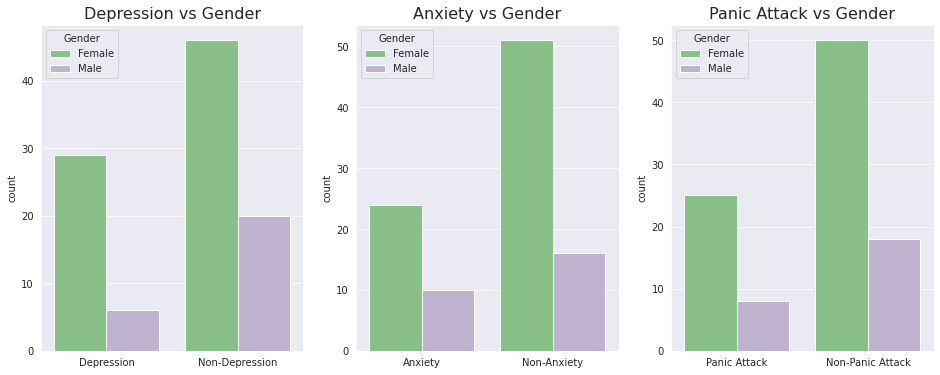

In [ ]:
#Visualization of student distribution by gender and students' mental health
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 3, figsize=(16,6))

sns.countplot(x='Depression', hue='Gender', 
              data=df, order=[1,0],
              palette='Accent', ax=ax[0])
ax[0].set_xticklabels(["Depression","Non-Depression"])
ax[0].set_xlabel(None)
ax[0].set_title("Depression vs Gender", fontsize = 16)
ax[0].legend(["Female","Male"], title="Gender")

sns.countplot(x='Anxiety', hue='Gender', 
              data=df, order=[1,0],
              palette='Accent', ax=ax[1])
ax[1].set_xticklabels(["Anxiety","Non-Anxiety"])
ax[1].set_xlabel(None)
ax[1].set_title("Anxiety vs Gender", fontsize = 16)
ax[1].legend(["Female","Male"], title="Gender")

sns.countplot(x='Panic Attack', hue='Gender',
              data=df, order=[1,0],
              palette='Accent', ax=ax[2])
ax[2].set_xticklabels(["Panic Attack","Non-Panic Attack"])
ax[2].set_xlabel(None)
ax[2].set_title("Panic Attack vs Gender", fontsize = 16)
ax[2].legend(["Female","Male"], title="Gender")

plt.show()

###**Age**

In [ ]:
#Descriptive statistics of age
df['Age'].describe().T

count    101.000000
mean      20.524752
std        2.484327
min       18.000000
25%       18.000000
50%       19.000000
75%       23.000000
max       24.000000
Name: Age, dtype: float64

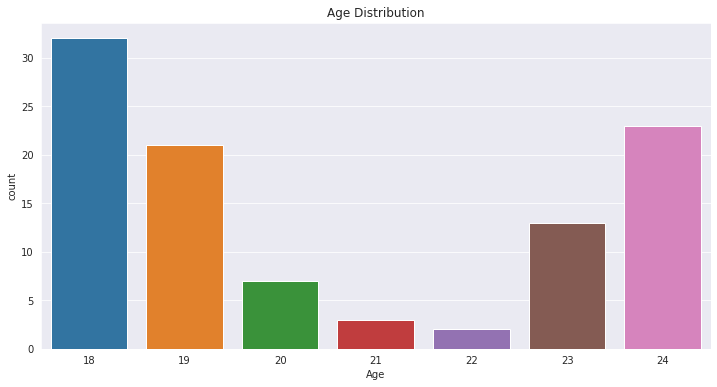

In [ ]:
#Visualization of  students distribution by age with pie chart 
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=df)
plt.title("Age Distribution")
plt.show()

###**Course**

In [ ]:
#Descriptive statistics of course column
pd.DataFrame(df['Course'].describe()).T

,count,unique,top,freq
Course,101,49,BCS,18


In [ ]:
#Counting the number of each unique variable
df['Course'].value_counts()

BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

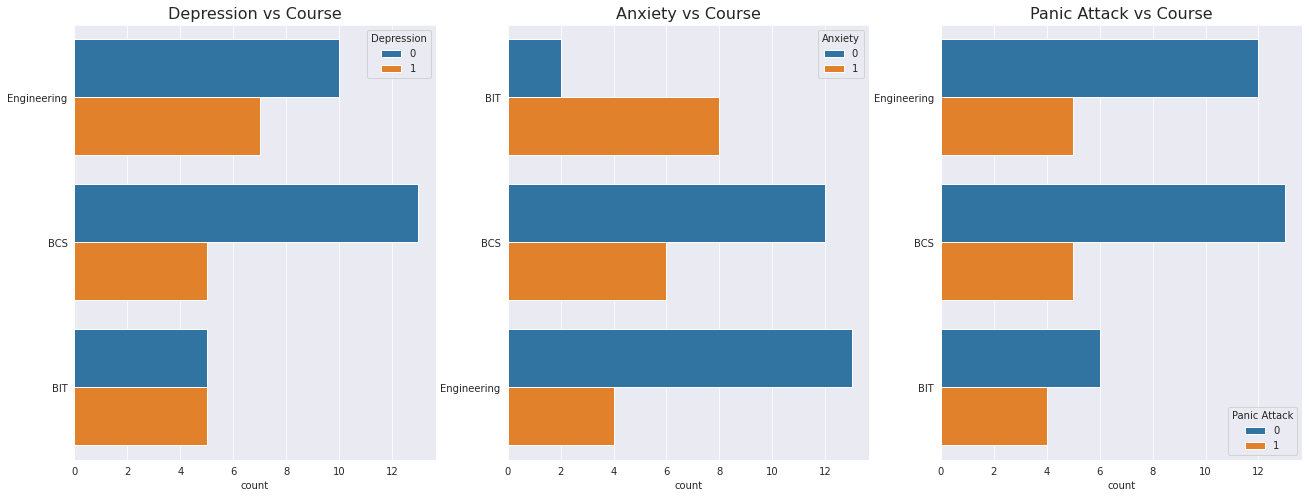

In [ ]:
#Visualization of student distribution by course and students' mental health
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 3, figsize=(22,8))

sns.countplot(y='Course', hue='Depression', 
              data=df, order=dep['Course'].value_counts(ascending=False).head(3).index,
              ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_title("Depression vs Course", fontsize = 16)

sns.countplot(y='Course', hue='Anxiety', 
              data=df, order=anx['Course'].value_counts(ascending=False).head(3).index,
              ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_title("Anxiety vs Course", fontsize = 16)

sns.countplot(y='Course', hue='Panic Attack', 
              data=df, order=pa['Course'].value_counts(ascending=False).head(3).index,
              ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_title("Panic Attack vs Course", fontsize = 16)

plt.show()

###**Current Year of Study**

In [ ]:
#Descriptive statistics of year study column
pd.DataFrame(df['Year Study'].describe()).T

,count,unique,top,freq
Year Study,101,4,Year 1,43


In [ ]:
#Counting number of students by current year study
year_count = pd.DataFrame(df['Year Study'].value_counts().reset_index())
year_count.rename(columns = {'index':'Year Study','Year Study':'Number of Students'}, inplace=True)
year_count

,Year Study,Number of Students
0,Year 1,43
1,Year 2,26
2,Year 3,24
3,Year 4,8


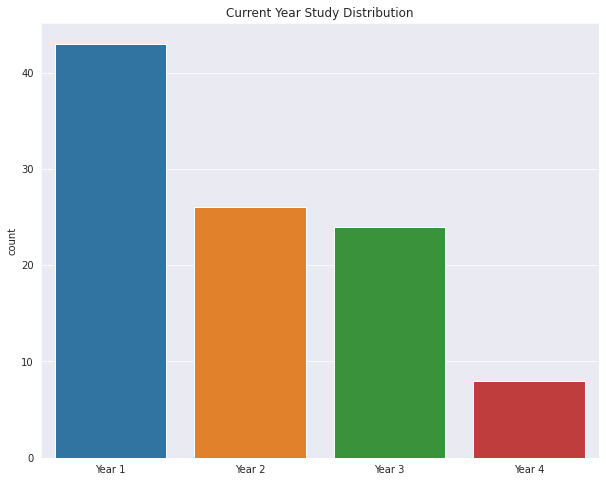

In [ ]:
#Visualization number of students by Current Year Study
plt.figure(figsize=(10,8))
sns.countplot(x='Year Study', data=df)
plt.xlabel(None)
plt.title("Current Year Study Distribution")
#plt.legend(['Female','Male'])
plt.show()

###**CGPA**

In [ ]:
#Counting number of students by CGPA
CGPA_count = pd.DataFrame(df['CGPA'].value_counts().reset_index())
CGPA_count.rename(columns = {'index':'CGPA','CGPA':'Number of Students'}, inplace=True)
CGPA_count

,CGPA,Number of Students
0,3.50 - 4.00,48
1,3.00 - 3.49,43
2,2.50 - 2.99,4
3,0 - 1.99,4
4,2.00 - 2.49,2


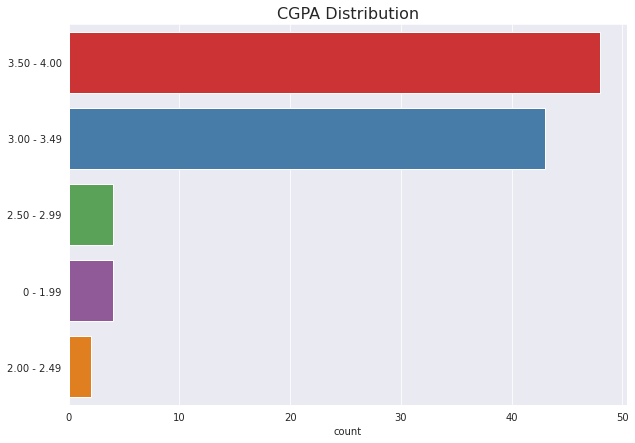

In [ ]:
#Visualization number of students by CGPA
plt.figure(figsize=(10,7))
sns.countplot(y='CGPA',
              data=df,
              order=df['CGPA'].value_counts().sort_values(ascending=False).index,
              palette="Set1")
plt.ylabel(None)
plt.title("CGPA Distribution", fontsize=16)
plt.show()

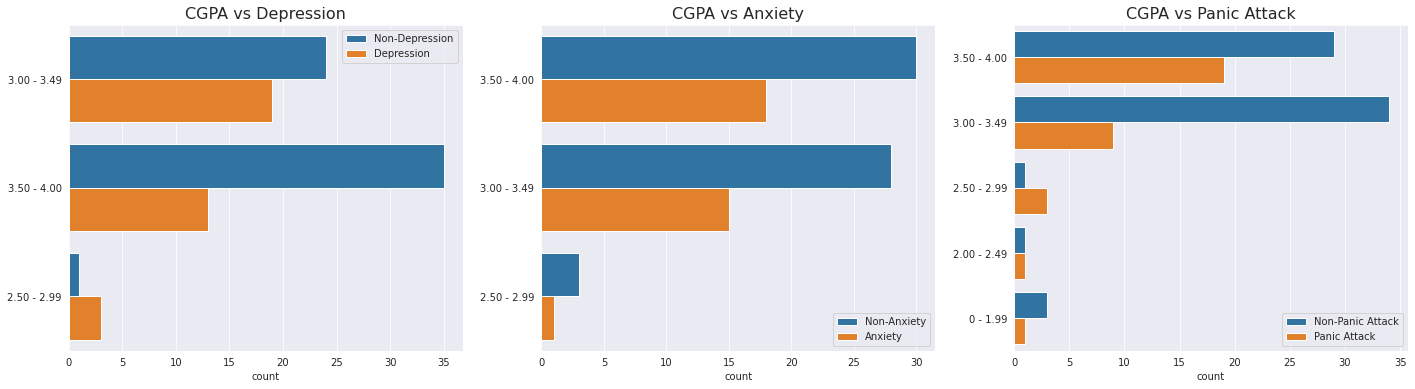

In [ ]:
#Visualization of student distribution by CGPA and students' mental health
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 3, figsize=(24,6))

sns.countplot(y='CGPA', hue='Depression', 
              data=df, order=dep['CGPA'].value_counts(ascending=False).index,
              ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_title("CGPA vs Depression", fontsize = 16)
ax[0].legend(["Non-Depression","Depression"])

sns.countplot(y='CGPA', hue='Anxiety', 
              data=df, order=anx['CGPA'].value_counts(ascending=False).index,
              ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_title("CGPA vs Anxiety", fontsize = 16)
ax[1].legend(["Non-Anxiety","Anxiety"])

sns.countplot(y='CGPA', hue='Panic Attack', 
              data=df, order=pa['CGPA'].value_counts(ascending=False).index,
              ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_title("CGPA vs Panic Attack", fontsize = 16)
ax[2].legend(["Non-Panic Attack","Panic Attack"])

plt.show()

###**Marital Status**

In [ ]:
#Counting number of students by marital status
mar_count = pd.DataFrame(df['Marital'].value_counts())
mar_count.rename(columns = {'index':'Marital','Marital':'Number of Students'},
                 index={0: 'Non-Marital', 1:'Marital'}, inplace=True)
mar_count

,Number of Students
Non-Marital,85
Marital,16


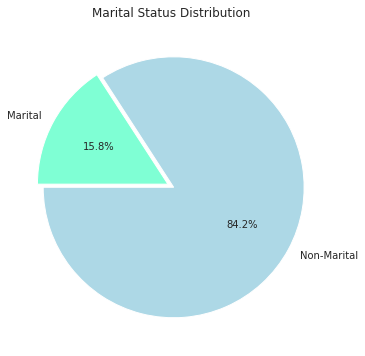

In [ ]:
#Visualization marital status distribution with pie chart
plt.figure(figsize=(12,6))
plt.pie(mar_count['Number of Students'], explode=(0.025,0.025), 
        labels=mar_count.index, 
        colors=['lightblue','aquamarine'],autopct='%1.1f%%', startangle=180)
plt.title("Marital Status Distribution")
plt.show()

##**Mental Health Analysis**

In [ ]:
print("Number of students who have depression:\n{} Students\n".format(len(dep['Depression'])))
print("Number of students who have anxiety:\n{} Students\n".format(len(anx['Anxiety'])))
print("Number of students who have panic attacks:\n{} Students\n".format(len(pa['Panic Attack'])))
print("Number of students who seek any specialist for a treatment:\n{} Students\n".format(len(df[df['Treatment']== 1])))

Number of students who have depression:
35 Students

Number of students who have anxiety:
34 Students

Number of students who have panic attacks:
33 Students

Number of students who seek any specialist for a treatment:
6 Students



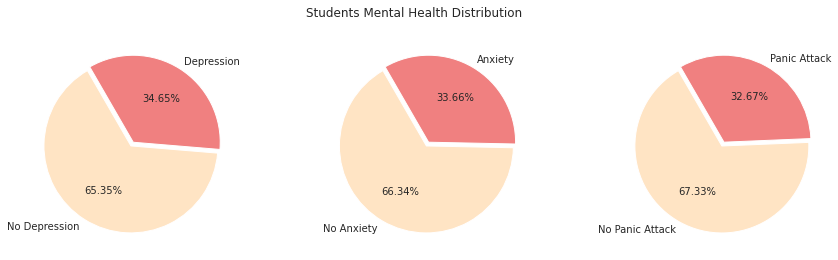

In [ ]:
#Visualization pie chart of student mental health
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

ax1.pie(df['Depression'].value_counts(), explode=(0.025,0.025), 
            labels=("No Depression","Depression"), 
            colors=['bisque','lightcoral'], autopct='%1.2f%%', startangle=120)

ax2.pie(df['Anxiety'].value_counts(), explode=(0.025,0.025), 
            labels=("No Anxiety","Anxiety"), 
            colors=['bisque','lightcoral'], autopct='%1.2f%%', startangle=120)

ax3.pie(df['Panic Attack'].value_counts(), explode=(0.025,0.025), 
            labels=("No Panic Attack","Panic Attack"), 
            colors=['bisque','lightcoral'], autopct='%1.2f%%', startangle=120)

plt.suptitle("Students Mental Health Distribution")
plt.show()

In [ ]:
#Counting the number of students experiencing depression and seeking treatment.
dep_treat = dep.groupby('Treatment')[['Depression']].count()
dep_treat.rename(columns = {'Depression':'Number of Students (Depression)'},
                 index={0: 'No', 1:'Yes'}, inplace=True)
dep_treat

,Number of Students (Depression)
Treatment,
No,29
Yes,6


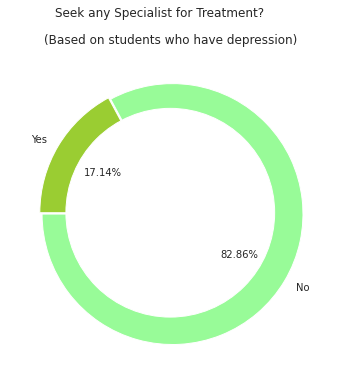

In [ ]:
#Visualization of comparison between students who have depression based on treatment needs.
plt.figure(figsize=(12,6))
plt.pie(dep_treat['Number of Students (Depression)'], explode=(0.02,0),  
        labels=dep_treat.index,
        colors=['palegreen','yellowgreen'], autopct='%1.2f%%', startangle=180)

centre_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("(Based on students who have depression)")
plt.suptitle('Seek any Specialist for Treatment?')
plt.show()

In [ ]:
#Creating a dataframe of students who have Depression, Anxiety, and Panic Attack
DAP = df[(df["Depression"]==1) & (df["Anxiety"]==1) & (df["Panic Attack"]==1)].reset_index(drop=True)
DAP

,Gender,Age,Course,Year Study,CGPA,Marital,Depression,Anxiety,Panic Attack,Treatment
0,1,19,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
1,0,24,ENM,Year 4,3.00 - 3.49,1,1,1,1,0
2,0,18,Marine science,Year 2,3.50 - 4.00,1,1,1,1,0
3,0,23,BCS,Year 3,3.50 - 4.00,0,1,1,1,0
4,0,24,BIT,Year 3,3.50 - 4.00,1,1,1,1,1
5,0,19,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
6,0,19,BIT,Year 1,2.50 - 2.99,0,1,1,1,0
7,0,20,koe,Year 3,3.00 - 3.49,1,1,1,1,0
8,0,24,Communication,Year 2,3.50 - 4.00,1,1,1,1,0
9,0,18,psychology,Year 1,3.50 - 4.00,0,1,1,1,0
